+Animal Welfare Center -

+Prediction of Animal Outcome State, from a Multiclass target column. The dataset comprises of Categorical and Numerical Features.
+Apply Your Furnished feature selection techniques and Modelling of classifiers to predict the state.

# IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# LOAD THE DATASET

In [2]:
train = pd.read_csv("train.csv",encoding="ISO-8859-1")
train

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,...,age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_type
0,A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,...,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,Return to Owner
1,A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,Return to Owner
2,A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,6.0,"(5.0, 7.5]",NaN,3,2014,2014-03,Saturday,17,3.0,Return to Owner
3,A047759,2004,4,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,...,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,Missing
4,A134067,1997,10,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,...,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,Return to Owner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47798,A723128,2007,9,8 years,Cat,Domestic Longhair Mix,Black/White,Normal,Stray,Neutered Male,...,8.0,"(7.5, 10.0]",2016-04-18 00:00:00,4,2016,2016-04,Monday,0,1.0,Rto-Adopt
47799,A723129,2015,3,1 year,Dog,Cairn Terrier Mix,Gray/White,Normal,Owner Surrender,Intact Male,...,1.0,"(-0.025, 2.5]",NaN,3,2016,2016-03,Tuesday,19,1.0,Adoption
47800,A723130,2005,3,11 years,Dog,Shetland Sheepdog Mix,Brown/Tan,Normal,Stray,Spayed Female,...,11.0,"(10.0, 12.5]",2016-03-27 17:07:00,3,2016,2016-03,Sunday,17,1.0,Return to Owner
47801,A723131,2011,3,5 years,Dog,Boxer/Catahoula,Brown Brindle/White,Normal,Stray,Intact Male,...,5.0,"(2.5, 5.0]",2016-04-09 13:37:00,4,2016,2016-04,Saturday,13,1.0,Adoption


In [3]:
test = pd.read_csv("test.csv",encoding="ISO-8859-1")
test

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,...,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number
0,A723133,2013,3,3 years,Cat,Domestic Shorthair Mix,Brown Tabby,Nursing,Stray,Intact Female,...,1095,3.000000,"(2.5, 5.0]",01-04-2016 16:19,4,2016,2016-04,Friday,16,1
1,A723134,2016,2,4 weeks,Cat,Domestic Shorthair Mix,Brown Tabby,Nursing,Stray,Intact Female,...,60,0.164384,"(-0.025, 2.5]",30-04-2016 17:42,4,2016,2016-04,Saturday,17,1
2,A723135,2016,2,4 weeks,Cat,Domestic Shorthair Mix,Brown Tabby,Nursing,Stray,Intact Male,...,60,0.164384,"(-0.025, 2.5]",29-04-2016 00:00,4,2016,2016-04,Friday,0,1
3,A723136,2016,2,4 weeks,Cat,Domestic Shorthair Mix,Brown Tabby,Nursing,Stray,Intact Female,...,30,0.082192,"(-0.025, 2.5]",27-04-2016 13:47,4,2016,2016-04,Wednesday,13,1
4,A723137,2016,2,4 weeks,Cat,Domestic Shorthair Mix,Blue Tabby,Nursing,Stray,Intact Female,...,60,0.164384,"(-0.025, 2.5]",03-05-2016 11:42,5,2016,2016-05,Tuesday,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31864,A769060,2018,3,2 weeks,Cat,Domestic Shorthair Mix,Tortie,Normal,Stray,Unknown,...,14,0.038356,"(-0.025, 2.5]",29-03-2018 18:14,3,2018,2018-03,Thursday,18,1
31865,A769064,2016,3,2 years,Other,Bat Mix,Brown,Normal,Wildlife,Unknown,...,730,2.000000,"(-0.025, 2.5]",29-03-2018 18:30,3,2018,2018-03,Thursday,18,1
31866,A769065,2017,3,1 year,Other,Bat Mix,Brown,Normal,Wildlife,Unknown,...,365,1.000000,"(-0.025, 2.5]",29-03-2018 18:28,3,2018,2018-03,Thursday,18,1
31867,A769066,2017,5,5 months,Dog,Labrador Retriever Mix,Black/White,Normal,Stray,Intact Male,...,300,0.821918,"(-0.025, 2.5]",31-03-2018 12:37,3,2018,2018-03,Saturday,12,1


# DATA PREPROCESSING

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47803 entries, 0 to 47802
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   animal_id_outcome           47803 non-null  object 
 1   dob_year                    47803 non-null  int64  
 2   dob_month                   47803 non-null  int64  
 3   age_upon_intake             47803 non-null  object 
 4   animal_type                 47803 non-null  object 
 5   breed                       47803 non-null  object 
 6   color                       47803 non-null  object 
 7   intake_condition            47803 non-null  object 
 8   intake_type                 47803 non-null  object 
 9   sex_upon_intake             47802 non-null  object 
 10  count                       47803 non-null  int64  
 11  age_upon_intake_(days)      47803 non-null  int64  
 12  age_upon_intake_(years)     47803 non-null  float64
 13  age_upon_intake_age_group   478

## Relation between columns and their visualisation

## Checking for Null values

In [5]:
train.isna().sum()

animal_id_outcome                0
dob_year                         0
dob_month                        0
age_upon_intake                  0
animal_type                      0
breed                            0
color                            0
intake_condition                 0
intake_type                      0
sex_upon_intake                  1
count                            0
age_upon_intake_(days)           0
age_upon_intake_(years)          0
age_upon_intake_age_group        0
intake_datetime                  0
intake_month                     0
intake_year                      0
intake_monthyear                 0
intake_weekday                   0
intake_hour                      0
intake_number                    0
time_in_shelter                  0
time_in_shelter_days             0
age_upon_outcome                 0
date_of_birth                    0
sex_upon_outcome                 1
age_upon_outcome_(days)          0
age_upon_outcome_(years)         0
age_upon_outcome_age

In [6]:
#% of null values
data_percentage=print('percentage of missing values'.upper())
train.isna().sum()/train.shape[0]*100

PERCENTAGE OF MISSING VALUES


animal_id_outcome              0.000000
dob_year                       0.000000
dob_month                      0.000000
age_upon_intake                0.000000
animal_type                    0.000000
breed                          0.000000
color                          0.000000
intake_condition               0.000000
intake_type                    0.000000
sex_upon_intake                0.002092
count                          0.000000
age_upon_intake_(days)         0.000000
age_upon_intake_(years)        0.000000
age_upon_intake_age_group      0.000000
intake_datetime                0.000000
intake_month                   0.000000
intake_year                    0.000000
intake_monthyear               0.000000
intake_weekday                 0.000000
intake_hour                    0.000000
intake_number                  0.000000
time_in_shelter                0.000000
time_in_shelter_days           0.000000
age_upon_outcome               0.000000
date_of_birth                  0.000000


In [7]:
cateogry_columns=train.select_dtypes(include=['category']).columns.tolist()
integer_columns=train.select_dtypes(include=['bool']).columns.tolist()

for column in train:
    if train[column].isnull().any():
        if(column in cateogry_columns):
            train[column]=train[column].fillna(train[column].mode()[0])
        else:
            train[column]=train[column].fillna(train[column].mean)

In [8]:
train.isna().sum()

animal_id_outcome             0
dob_year                      0
dob_month                     0
age_upon_intake               0
animal_type                   0
breed                         0
color                         0
intake_condition              0
intake_type                   0
sex_upon_intake               0
count                         0
age_upon_intake_(days)        0
age_upon_intake_(years)       0
age_upon_intake_age_group     0
intake_datetime               0
intake_month                  0
intake_year                   0
intake_monthyear              0
intake_weekday                0
intake_hour                   0
intake_number                 0
time_in_shelter               0
time_in_shelter_days          0
age_upon_outcome              0
date_of_birth                 0
sex_upon_outcome              0
age_upon_outcome_(days)       0
age_upon_outcome_(years)      0
age_upon_outcome_age_group    0
outcome_datetime              0
outcome_month                 0
outcome_

+ NO NULL VALUES

### Drop the unneccesory columns

In [9]:
train.columns

Index(['animal_id_outcome', 'dob_year', 'dob_month', 'age_upon_intake',
       'animal_type', 'breed', 'color', 'intake_condition', 'intake_type',
       'sex_upon_intake', 'count', 'age_upon_intake_(days)',
       'age_upon_intake_(years)', 'age_upon_intake_age_group',
       'intake_datetime', 'intake_month', 'intake_year', 'intake_monthyear',
       'intake_weekday', 'intake_hour', 'intake_number', 'time_in_shelter',
       'time_in_shelter_days', 'age_upon_outcome', 'date_of_birth',
       'sex_upon_outcome', 'age_upon_outcome_(days)',
       'age_upon_outcome_(years)', 'age_upon_outcome_age_group',
       'outcome_datetime', 'outcome_month', 'outcome_year',
       'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'outcome_type'],
      dtype='object')

In [10]:
drop=["outcome_datetime","intake_datetime",
                    'date_of_birth','intake_monthyear','intake_datetime',
                    'outcome_monthyear','outcome_datetime','time_in_shelter',
                   'age_upon_intake','age_upon_outcome','age_upon_intake_(days)','age_upon_intake_(years)','age_upon_outcome_(days)',
                'age_upon_outcome_(years)','intake_number','sex_upon_intake','sex_upon_outcome']
train.drop(drop,axis=1,inplace=True)


# LABEL ENCODING

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47803 entries, 0 to 47802
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   animal_id_outcome           47803 non-null  object 
 1   dob_year                    47803 non-null  int64  
 2   dob_month                   47803 non-null  int64  
 3   animal_type                 47803 non-null  object 
 4   breed                       47803 non-null  object 
 5   color                       47803 non-null  object 
 6   intake_condition            47803 non-null  object 
 7   intake_type                 47803 non-null  object 
 8   count                       47803 non-null  int64  
 9   age_upon_intake_age_group   47803 non-null  object 
 10  intake_month                47803 non-null  int64  
 11  intake_year                 47803 non-null  int64  
 12  intake_weekday              47803 non-null  object 
 13  intake_hour                 478

In [12]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
train['dob_year']=label.fit_transform(train.dob_year)
train['dob_month']=label.fit_transform(train.dob_month)
train['animal_type']=label.fit_transform(train.animal_type)
train['breed']=label.fit_transform(train.breed)
train['color']=label.fit_transform(train.color)
train['intake_condition']=label.fit_transform(train.intake_condition)
train['intake_type']=label.fit_transform(train.intake_type)
#train['sex_upon_intake']=label.fit_transform(train.sex_upon_intake)
#train['count']=label.fit_transform(train.count)
train['age_upon_intake_age_group']=label.fit_transform(train.age_upon_intake_age_group)
train['intake_month']=label.fit_transform(train.intake_month)
train['intake_year']=label.fit_transform(train.intake_year)
train['intake_weekday']=label.fit_transform(train.intake_weekday)
train['intake_hour']=label.fit_transform(train.intake_hour)
train['time_in_shelter_days']=label.fit_transform(train.time_in_shelter_days)
#train['sex_upon_outcome']=label.fit_transform(train.sex_upon_outcome)
train['age_upon_outcome_age_group']=label.fit_transform(train.age_upon_outcome_age_group)
train['outcome_month']=label.fit_transform(train.outcome_month)
train['outcome_year']=label.fit_transform(train.outcome_year)
train['outcome_weekday']=label.fit_transform(train.outcome_weekday)
train['outcome_hour']=label.fit_transform(train.outcome_hour)
train['outcome_number']=label.fit_transform(train.outcome_number)
train['outcome_type']=label.fit_transform(train.outcome_type)
train['animal_id_outcome']=label.fit_transform(train.animal_id_outcome)



In [13]:
train.head()

,animal_id_outcome,dob_year,dob_month,animal_type,breed,color,intake_condition,intake_type,count,age_upon_intake_age_group,...,intake_weekday,intake_hour,time_in_shelter_days,age_upon_outcome_age_group,outcome_month,outcome_year,outcome_weekday,outcome_hour,outcome_number,outcome_type
0,0,15,6,2,1707,441,3,3,1,8,...,4,14,762,8,11,4,4,0,0,6
1,0,15,6,2,1707,441,3,2,1,7,...,0,10,1719,7,11,1,2,15,1,6
2,0,15,6,2,1707,441,3,2,1,7,...,0,14,1512,7,2,1,2,16,2,6
3,1,12,3,2,718,375,3,1,1,8,...,6,15,5082,8,3,1,1,14,0,4
4,2,5,9,2,1618,154,2,2,1,3,...,2,9,171,3,10,0,2,10,0,6


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47803 entries, 0 to 47802
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   animal_id_outcome           47803 non-null  int32
 1   dob_year                    47803 non-null  int64
 2   dob_month                   47803 non-null  int64
 3   animal_type                 47803 non-null  int32
 4   breed                       47803 non-null  int32
 5   color                       47803 non-null  int32
 6   intake_condition            47803 non-null  int32
 7   intake_type                 47803 non-null  int32
 8   count                       47803 non-null  int64
 9   age_upon_intake_age_group   47803 non-null  int32
 10  intake_month                47803 non-null  int64
 11  intake_year                 47803 non-null  int64
 12  intake_weekday              47803 non-null  int32
 13  intake_hour                 47803 non-null  int64
 14  time_i

# Splitting the train dataset

In [15]:
X= train.iloc[:,train.columns!='outcome_type']
y =train.outcome_type

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [17]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(38242, 21)
(38242,)
(9561, 21)
(9561,)


(None, None)

# Feature Selection: Using Chi square

In [18]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2 = SelectKBest(score_func=chi2, k='all')
model_chi2 = chi2.fit(X_train, y_train)

print(model_chi2.scores_)
features_select =model_chi2.transform(X_train)

[4.03625162e+06 1.72917094e+03 5.38065355e+01 1.13042704e+03
 8.02876621e+04 3.42201076e+04 3.31365597e+02 4.06102114e+02
 6.15095637e-29 1.47209790e+04 1.70172590e+02 3.88128262e+02
 3.30027505e+01 5.15811991e+01 4.88213324e+07 1.46166502e+04
 1.80968589e+02 3.62789908e+02 5.68014305e+01 2.13787162e+03
 3.49009300e+03]


In [19]:
features=np.array([1.72917094e+03 ,5.38065355e+01, 1.13042704e+03 ,8.02876621e+04,
 3.42201076e+04, 3.31365597e+02, 4.06102114e+02, 6.15095637e-29,
 1.47209790e+04, 1.70172590e+02, 3.88128262e+02, 3.30027505e+01,
 5.15811991e+01, 4.88213324e+07, 1.46166502e+04, 1.80968589e+02,
 3.62789908e+02, 5.68014305e+01, 2.13787162e+03, 3.49009300e+03])

In [20]:
features=pd.DataFrame(features)

<AxesSubplot:>

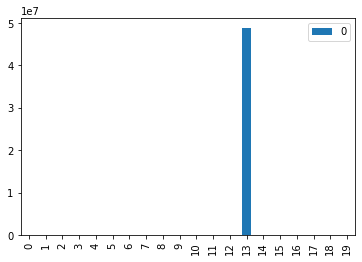

In [21]:
features.plot.bar()

# Feature Selection:Using Mutual info classifier

In [22]:
from sklearn.feature_selection import mutual_info_classif

mic = SelectKBest(score_func=mutual_info_classif, k='all')
model_mic=mic.fit(X_train, y_train)
features_select = model_mic.transform(X_train)

Feature 0: 0.151233
Feature 1: 0.058946
Feature 2: 0.009837
Feature 3: 0.158292
Feature 4: 0.199673
Feature 5: 0.094573
Feature 6: 0.059227
Feature 7: 0.161092
Feature 8: 0.000000
Feature 9: 0.049636
Feature 10: 0.005074
Feature 11: 0.021224
Feature 12: 0.003202
Feature 13: 0.011309
Feature 14: 0.297136
Feature 15: 0.048533
Feature 16: 0.004102
Feature 17: 0.012021
Feature 18: 0.004478
Feature 19: 0.085900
Feature 20: 0.035556


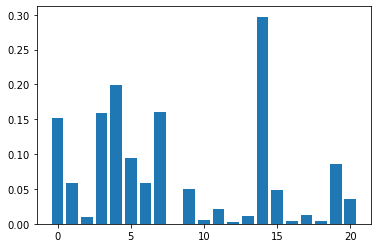

In [23]:
for i in range(len(model_mic.scores_)):
    print('Feature %d: %f' % (i, model_mic.scores_[i]))
    
plt.bar([i for i in range(len(model_mic.scores_))], model_mic.scores_)
plt.show()  

# Decision tree

In [24]:
from sklearn.tree import  DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
results = cross_val_score(model_dt,X_train, y_train)
print(results.mean())

0.4606974665378633


Feature: 0, Score: 0.11603
Feature: 1, Score: 0.03998
Feature: 2, Score: 0.04380
Feature: 3, Score: 0.09468
Feature: 4, Score: 0.05901
Feature: 5, Score: 0.07229
Feature: 6, Score: 0.02786
Feature: 7, Score: 0.07257
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00664
Feature: 10, Score: 0.02620
Feature: 11, Score: 0.00890
Feature: 12, Score: 0.03612
Feature: 13, Score: 0.05239
Feature: 14, Score: 0.19172
Feature: 15, Score: 0.00780
Feature: 16, Score: 0.02764
Feature: 17, Score: 0.01147
Feature: 18, Score: 0.03588
Feature: 19, Score: 0.05844
Feature: 20, Score: 0.01059


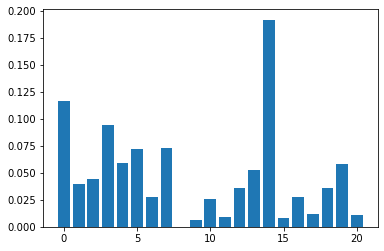

In [25]:
 #get importance
imp = model_dt.feature_importances_
#summarize feature importance
for i,v in enumerate(imp):
    print('Feature: %0d, Score: %.5f' % (i,v))
#plot feature importance
plt.bar([x for x in range(len(imp))], imp)
plt.show()

# Final columns to be dropped are as follows

In [26]:
new_data =train

In [27]:
train = train.drop(columns=["age_upon_intake_age_group","age_upon_outcome_age_group",'count',
       'intake_year', 'intake_weekday','outcome_year', 'outcome_weekday' ])
train.shape

(47803, 15)

In [28]:
train.columns

Index(['animal_id_outcome', 'dob_year', 'dob_month', 'animal_type', 'breed',
       'color', 'intake_condition', 'intake_type', 'intake_month',
       'intake_hour', 'time_in_shelter_days', 'outcome_month', 'outcome_hour',
       'outcome_number', 'outcome_type'],
      dtype='object')

### Splitting the dataset

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(new_data,y,test_size=0.2, random_state=42)

In [30]:
print(x_train.shape), print(Y_train.shape)
print(x_test.shape), print(Y_test.shape)

(38242, 22)
(38242,)
(9561, 22)
(9561,)


(None, None)

In [31]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47803 entries, 0 to 47802
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   animal_id_outcome           47803 non-null  int32
 1   dob_year                    47803 non-null  int64
 2   dob_month                   47803 non-null  int64
 3   animal_type                 47803 non-null  int32
 4   breed                       47803 non-null  int32
 5   color                       47803 non-null  int32
 6   intake_condition            47803 non-null  int32
 7   intake_type                 47803 non-null  int32
 8   count                       47803 non-null  int64
 9   age_upon_intake_age_group   47803 non-null  int32
 10  intake_month                47803 non-null  int64
 11  intake_year                 47803 non-null  int64
 12  intake_weekday              47803 non-null  int32
 13  intake_hour                 47803 non-null  int64
 14  time_i

# 1)LOGISTIC REGRESSION

In [32]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression(solver='liblinear')
model_log.fit(x_train,Y_train)

LogisticRegression(solver='liblinear')

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Y_pred = model_log.predict(x_test)
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.7434368789875536
[[2571    0    0    0    0    0    0    0    0]
 [ 398   14    0  156    0    0    6    0    0]
 [   0    3    0   21    1    2    0    0    0]
 [   0    6    1  471   42   15  243    4    0]
 [   0    2    0   58  105   68  281   12    0]
 [   0    0    0   27   28   79  329   65    1]
 [   0    0    0    1    0    4 1780   33  112]
 [   0    0    0    0    0    1  127   22  352]
 [   0    0    0    0    0    0   53    1 2066]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2571
           1       0.56      0.02      0.05       574
           2       0.00      0.00      0.00        27
           3       0.64      0.60      0.62       782
           4       0.60      0.20      0.30       526
           5       0.47      0.15      0.23       529
           6       0.63      0.92      0.75      1930
           7       0.16      0.04      0.07       502
           8       0.82      0.97      0.89      2120

    ac

In [34]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average='micro')

0.7434368789875536

# 2)Decision Tree

In [35]:
from sklearn.tree import  DecisionTreeClassifier

model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,Y_train)

DecisionTreeClassifier()

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Y_pred = model_dt.predict(x_test)
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

1.0
[[2571    0    0    0    0    0    0    0    0]
 [   0  574    0    0    0    0    0    0    0]
 [   0    0   27    0    0    0    0    0    0]
 [   0    0    0  782    0    0    0    0    0]
 [   0    0    0    0  526    0    0    0    0]
 [   0    0    0    0    0  529    0    0    0]
 [   0    0    0    0    0    0 1930    0    0]
 [   0    0    0    0    0    0    0  502    0]
 [   0    0    0    0    0    0    0    0 2120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2571
           1       1.00      1.00      1.00       574
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00       782
           4       1.00      1.00      1.00       526
           5       1.00      1.00      1.00       529
           6       1.00      1.00      1.00      1930
           7       1.00      1.00      1.00       502
           8       1.00      1.00      1.00      2120

    accuracy         

In [37]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average='micro')

1.0

# 3)Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
model_rf = RandomForestClassifier(n_estimators=num_trees)
model_rf.fit(x_train,Y_train)

RandomForestClassifier()

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Y_pred = model_rf.predict(x_test)
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.9900638008576509
[[2571    0    0    0    0    0    0    0    0]
 [   0  563    0    9    1    1    0    0    0]
 [   0    0   25    2    0    0    0    0    0]
 [   0    1    1  755   24    0    1    0    0]
 [   0    1    0   10  507    7    1    0    0]
 [   0    0    0    3    5  517    4    0    0]
 [   0    0    0    0    0   11 1918    1    0]
 [   0    0    0    0    0    2   10  490    0]
 [   0    0    0    0    0    0    0    0 2120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2571
           1       1.00      0.98      0.99       574
           2       0.96      0.93      0.94        27
           3       0.97      0.97      0.97       782
           4       0.94      0.96      0.95       526
           5       0.96      0.98      0.97       529
           6       0.99      0.99      0.99      1930
           7       1.00      0.98      0.99       502
           8       1.00      1.00      1.00      2120

    ac

In [40]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average='micro')

0.9900638008576509

# 4)Support vector Classifier

# 5)Gausian NB

In [41]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(x_train,Y_train)

GaussianNB()

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Y_pred = model_nb.predict(x_test)
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.9653801903566572
[[2532   39    0    0    0    0    0    0    0]
 [  21  535   18    0    0    0    0    0    0]
 [   0    5   20    2    0    0    0    0    0]
 [   0    0   22  733   27    0    0    0    0]
 [   0    0    0   27  496    0    3    0    0]
 [   0    0    0    0    0  468   61    0    0]
 [   0    0    0    0    0   19 1894   17    0]
 [   0    0    0    0    0    0   42  437   23]
 [   0    0    0    0    0    0    0    5 2115]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2571
           1       0.92      0.93      0.93       574
           2       0.33      0.74      0.46        27
           3       0.96      0.94      0.95       782
           4       0.95      0.94      0.95       526
           5       0.96      0.88      0.92       529
           6       0.95      0.98      0.96      1930
           7       0.95      0.87      0.91       502
           8       0.99      1.00      0.99      2120

    ac

In [43]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average='micro')

0.9653801903566572

# So here decision tree is giving 100% accuracy,so ignoring this one and random forest giving best accuracy,so predicting the model on random forest.

# TEST DATA SET

In [44]:
drop=["outcome_datetime","intake_datetime",
                    'date_of_birth','intake_monthyear','intake_datetime',
                    'outcome_monthyear','outcome_datetime','time_in_shelter',
                   'age_upon_intake','age_upon_outcome','age_upon_intake_(days)','age_upon_intake_(years)','age_upon_outcome_(days)',
                'age_upon_outcome_(years)','intake_number','sex_upon_intake','sex_upon_outcome']
test.drop(drop,axis=1,inplace=True)


In [45]:
test = test.drop(columns=["age_upon_intake_age_group","age_upon_outcome_age_group",'count',
       'intake_year', 'intake_weekday','outcome_year', 'outcome_weekday' ])
test.shape

(31869, 14)

In [46]:
test.columns

Index(['animal_id_outcome', 'dob_year', 'dob_month', 'animal_type', 'breed',
       'color', 'intake_condition', 'intake_type', 'intake_month',
       'intake_hour', 'time_in_shelter_days', 'outcome_month', 'outcome_hour',
       'outcome_number'],
      dtype='object')

In [47]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
test['dob_year']=label.fit_transform(test.dob_year)
test['dob_month']=label.fit_transform(test.dob_month)
test['animal_type']=label.fit_transform(test.animal_type)
test['breed']=label.fit_transform(test.breed)
test['color']=label.fit_transform(test.color)
test['intake_condition']=label.fit_transform(test.intake_condition)
test['intake_type']=label.fit_transform(test.intake_type)
test['intake_month']=label.fit_transform(test.intake_month)
test['intake_hour']=label.fit_transform(test.intake_hour)
test['time_in_shelter_days']=label.fit_transform(test.time_in_shelter_days)
test['outcome_month']=label.fit_transform(test.outcome_month)
test['outcome_hour']=label.fit_transform(test.outcome_hour)
test['outcome_number']=label.fit_transform(test.outcome_number)
test['animal_id_outcome']=label.fit_transform(test.animal_id_outcome)


In [48]:
test.head()

,animal_id_outcome,dob_year,dob_month,animal_type,breed,color,intake_condition,intake_type,intake_month,intake_hour,time_in_shelter_days,outcome_month,outcome_hour,outcome_number
0,0,20,2,1,455,99,4,3,2,11,4850,3,15,0
1,1,23,1,1,455,99,4,3,2,11,12220,3,16,0
2,2,23,1,1,455,99,4,3,2,11,11997,3,0,0
3,3,23,1,1,455,99,4,3,2,11,11803,3,12,0
4,4,23,1,1,455,63,4,3,2,11,12463,4,10,0


In [49]:
X.shape,X_test.shape

((47803, 21), (9561, 21))

In [50]:
y.shape

(47803,)

In [51]:
from sklearn.ensemble import RandomForestClassifier

y = train["outcome_type"]

features = ['dob_year', 'dob_month', 'animal_type', 'breed', 'color',
       'intake_condition', 'intake_type', 'intake_month', 'intake_hour',
       'time_in_shelter_days', 'outcome_month', 'outcome_hour',
       'outcome_number']
X= train.iloc[:,train.columns!='outcome_type']
X_test = test.iloc[:,test.columns!='outcome_type']

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)



C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


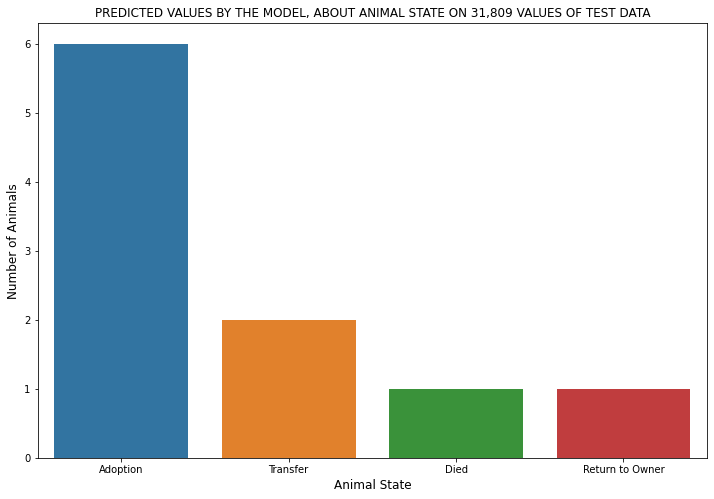

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
output = pd.read_csv("sample_submission.csv")

output["outcome_type"].value_counts() # Predicted Values
#pred_Values = df1["outcome_type"].value_counts(normalize=True) #For relative Frequencies
pred_Values = output["outcome_type"].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(pred_Values.index, pred_Values.values, alpha=1.0, dodge=False)
plt.title('PREDICTED VALUES BY THE MODEL, ABOUT ANIMAL STATE ON 31,809 VALUES OF TEST DATA')
plt.ylabel('Number of Animals', fontsize=12)
plt.xlabel('Animal State', fontsize=12)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


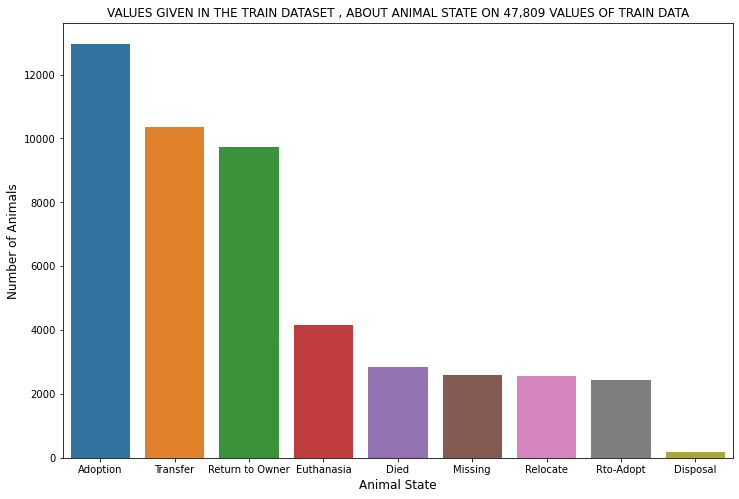

In [53]:
output_train = pd.read_csv("train.csv")

output_train["outcome_type"].value_counts() #Original DataSet Target Values
#X2["outcome_type"].value_counts(dropna=False)
original_Values = output_train["outcome_type"].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(original_Values.index, original_Values.values, alpha=1.0, dodge=False)
plt.title('VALUES GIVEN IN THE TRAIN DATASET , ABOUT ANIMAL STATE ON 47,809 VALUES OF TRAIN DATA')
plt.ylabel('Number of Animals', fontsize=12)
plt.xlabel('Animal State', fontsize=12)
plt.show()

In [54]:
output = pd.DataFrame({'animal_id_outcome': test.animal_id_outcome, 'outcome_type': predictions})
output

,animal_id_outcome,outcome_type
0,0,6
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
31864,29277,8
31865,29278,3
31866,29279,3
31867,29280,6


+ From above visualisation outcome type 0=adoption,1=transfer,2=return to owner,3=Euthanasia,4=Died,5=Missing,6=Relocate,7=Rto-Adoptan, 8=Disposal are belongs

+ And I have converted 'animal_id_outcome' to the numberic by using label encoder for better model building

+ Train and test dataset is different as some of Euthanasia,missing,relocate,Rto-Adopt and desposal are imbalanced while predicting

In [55]:
output.to_csv('challenge_submission.csv',index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!
